In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

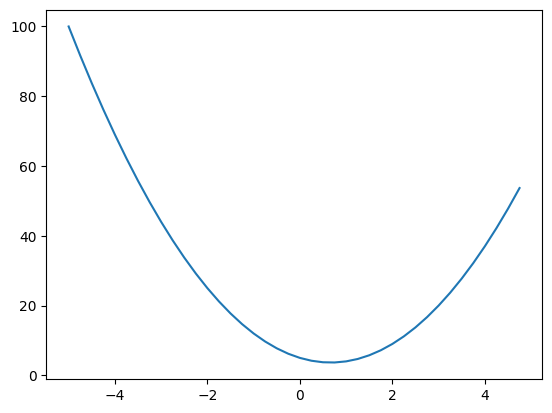

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = [f(x) for x in xs]
plt.plot(xs, ys)

## Derivative
The formula for the derivative of a function \(f(x)\) is:
$$
f'(x) = \lim_{{h \to 0}} \frac{{f(x+h) - f(x)}}{h}
$$

In [5]:
# calculate the derivative
h = 0.001 # very small number
x = 3.0

del_y = f(x + h) - f(x) # small increase in x, will cause to go slightly up in y by change_in_y
del_x = h # small increase in x

derivative = del_y / del_x
derivative # this gives us the slope of the line at x = 3
# for 3x^2 - 4x + 5, the derivative is : 6x - 4 the slope at x = 3 is 14

14.00300000000243

In [6]:
h = 0.000001 # making change in x very small as close to 0
x = -3.0 # at x = -3

( f( x + h ) - f(x) ) / h # slope is negative for negative x

-21.999997002808414

In [7]:
h = 0.000001
x = 2/3

( f( x + h ) - f(x) ) / h # slope is 0 for x = 2/3
# so at some point the derivative is 0 which is the minimum point of y

2.999378523327323e-06

Slope is Positive means the function is increasignly steeply at that point and Negative means the functions is decreasingly steeply at that point.

In [8]:
a = 2.0
b = -3.0
c = 10.0
d = a * b + c

d

4.0

In [9]:
h = 0.000001

a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c

print(f"d1: {d1}") # 4
print(f"d2: {d2}") # we bump a by h so a will be slightly more positive but b is negative so d2 will be less than d1 because we are adding more negative to c in d2 than in d1
print(f"Slope: {(d2 - d1) / h}") # we are going down with slope 3

d1: 4.0
d2: 3.9999969999999996
Slope: -3.000000000419334


##### Partial Derivative
In d2 we increase a by small value h so the **derivative with respect to a** will be mathematically: d(a * b + c)/d(a) = b = -3 so mathematically our answer should be -3 and we found our slope to be also ~-3

In [10]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
b += h
d2 = a * b + c

print(f"d1: {d1}") # 4
print(f"d2: {d2}")
print(f"Slope: {(d2 - d1) / h}")

d1: 4.0
d2: 4.0002
Slope: 2.0000000000042206


In [11]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h

d2 = a * b + c

print(f"d1: {d1}") # 4
print(f"d2: {d2}")
print(f"Slope: {(d2 - d1) / h}")

d1: 4.0
d2: 4.0001
Slope: 0.9999999999976694


## Neural Network

In [58]:
class Value:
    def __init__(self, data: int, _children: tuple = (), _op: str="", label: str=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        """get the other value, add to this value and return a new value"""
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other): # instance_a.__mul__(instance_b)
        out = Value(self.data * other.data, (self, other), "*")
        return out

In [136]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label = "e"

d = e + c; d.label = "d"

f = Value(-2.0, label="f")
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [137]:
L._prev # we keep track of the previous values here
# first during __mul__(): _prev = (a, b) # (2, -3)
# second during __add__(): _prev = (a, b, c) # (-6, 10)

{Value(data=-2.0), Value(data=4.0)}

L is the final output after forward propagation

In [138]:
L._op

'*'

## Trace Graph

In [92]:
from graphviz import Digraph

In [139]:
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label ,n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

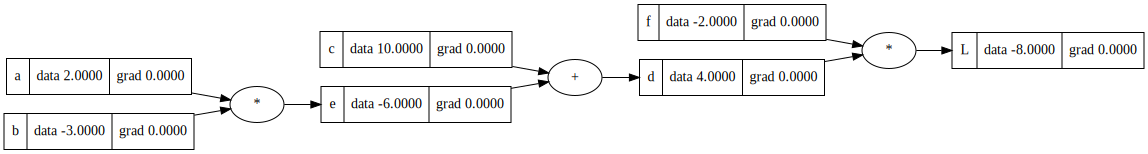

In [140]:
draw_dot(L) # output of L
# Here L is the output and we can call this as forward propagation where the input a and b affect each intermediate which are weights of the model.

In [141]:
def lol():
  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0 + h, label="a") # increase in a
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L2 = L.data

  print((L2 - L1)/h) # derivative of L with respect to a

In [142]:
lol()

6.000000000021544


In [143]:
def lol2():
  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L2 = L.data + h # change in h will impact h

  print((L2 - L1)/h) # derivative of L with respect to L

lol2()

0.9999999999976694


In [144]:
L.grad = 1 # because we found increase in L will change L by 1

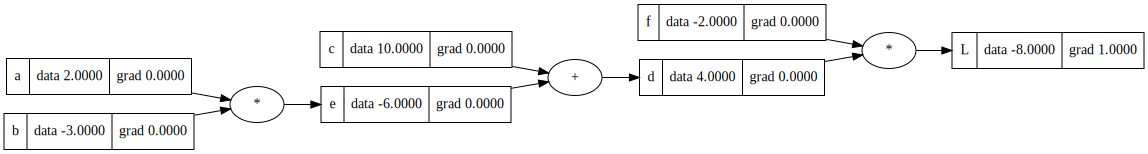

In [145]:
draw_dot(L)

In [146]:
# L = d * f
# dL/df = ?
# we know from derivative:
# derivative = f(x + h) - f(x) / h for small change in x
# ((d+h)*f - d*f)/h : small change in d
# df + hf - df / h : hf / h : f = -2

In [147]:
f.grad = 4.0
d.grad = -2

In [148]:
# checking for dL/df
def lol3():
  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0 + h, label="f") # small change in f
  L = d * f; L.label = "L"
  L2 = L.data

  print((L2 - L1)/h) # derivative of L with respect to f

lol3()

3.9999999999995595


In [155]:
# checking for dL/dd
# checking for dL/df
def lol3():
  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  d.data += h # small change in d
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L2 = L.data

  print((L2 - L1)/h) # derivative of L with respect to d

lol3()

-1.9999999999953388


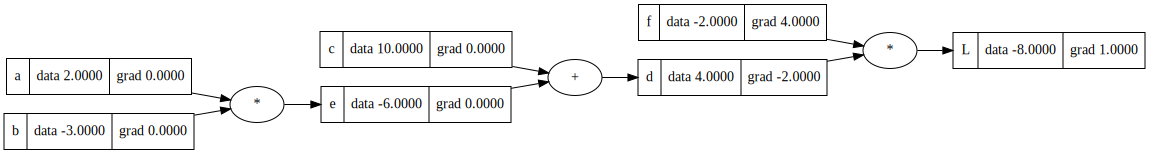

In [150]:
draw_dot(L)

#### change in L with respect to c
dL / dc = dL / dd * dd / dc

d = c + e

dd / dc = 1.0 # definition of derivative
**proof**
((c + h) + e) - (c + e) / h : h / h : 1

L = d * f
dL / dd = f

so dL / dc = f + 1.0 = f : -2

#### Intutive Example: Chain Rule
Instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x as the product of the two rates of change.

If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man then the car travels 2 * 4 = 8 times as fast as the man.

let z = car, y = bicycle and x = man

dz/dx = dz/dy * dy/dx

dz/dy = 2

dy/dx = 4

dz/dx = 8

In [156]:
c.grad = -2.0
e.grad = -2.0 # because + node will simple route the grad due to partial derivative with respect to each e and c for d.

In [157]:
# verification
def lol4():
  h = 0.001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  c.data += h
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L2 = L.data

  print((L2 - L1)/h) # derivative of L with respect to c

lol4()

-1.9999999999988916


In [158]:
def lol4():
  h = 0.001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  e.data += h
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L2 = L.data

  print((L2 - L1)/h) # derivative of L with respect to e

lol4()

-2.000000000000668


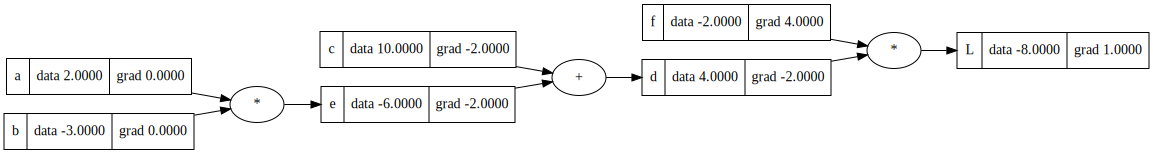

In [159]:
draw_dot(L)

#### Change of L with respect to a and b (start node)

**dL / de** = -2.0

**dL / da** = dL / dd * dd / de * de / da = dL / de * de / da = -2.0 * de / da

**de / da** = ? b because e = a*b and e with respect to a is b = -3 so dL/da = 6

**dL / db** = dL / dd * dd / de * de / db

similarly
**dl/db** = dL / de * de / da = -2.0 * a = -2.0 * 2 = -4

In [160]:
# verification of derivative of L for input
def lol5():
  h = 0.001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0 + h, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L2 = L.data

  print((L2 - L1)/h) # derivative of L with respect to a

lol5()

6.000000000000227


In [161]:
def lol6():
  h = 0.001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0 + h, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label = "e"
  d = e + c; d.label = "d"
  f = Value(-2.0, label="f")
  L = d * f; L.label = "L"
  L2 = L.data

  print((L2 - L1)/h) # derivative of L with respect to b

lol6()

-3.9999999999995595


In [162]:
a.grad = 6.0
b.grad = -4.0

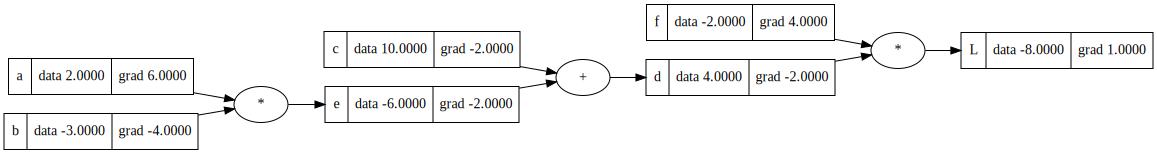

In [163]:
draw_dot(L)

## Updating Gradient
a.data = a.data + 0.01 * a.grad # go in the direction of gradient

b.data = b.data + 0.01 * b.grad # go in the direction of gradient

In [164]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
# for only leaf node which we have control over

In [167]:
e = a * b
d = c + e
L = d * f

print(L.data)

-7.286496


## Backpropagation over a Neuron (Simple Backprop)

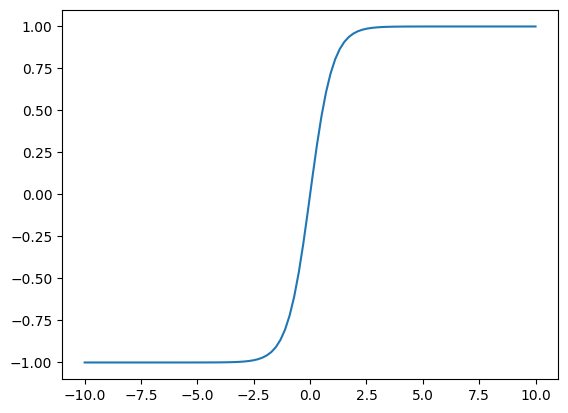

In [172]:
def plt_tanh():
  x = np.linspace(-10, 10, 100)
  y = np.tanh(x)
  plt.plot(x, y)
  plt.show()
plt_tanh()

In [182]:
class Value:
    def __init__(self, data: int, _children: tuple = (), _op: str="", label: str=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        """get the other value, add to this value and return a new value"""
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other): # instance_a.__mul__(instance_b)
        out = Value(self.data * other.data, (self, other), "*")
        return out

    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1)/(np.exp(2*x) + 1)
        out = Value(t, (self, ), "tanh")
        return out

In [188]:
x1 = Value(2.0, label="x1") # input 1
x2 = Value(0.0, label="x2") # input 2

w1 = Value(-3.0, label="w1") # weight 1
w2 = Value(1.0, label="w2") # weight 2
b = Value(6.8813735870195432, label="b") # bias 1

x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1w1x2w2 + b; n.label = "n"

o = n.tanh(); o.label = "o"

# input1:  O>
#      w1 and w2 and bias      O ->   tanh(n) -> output
# input2: O>

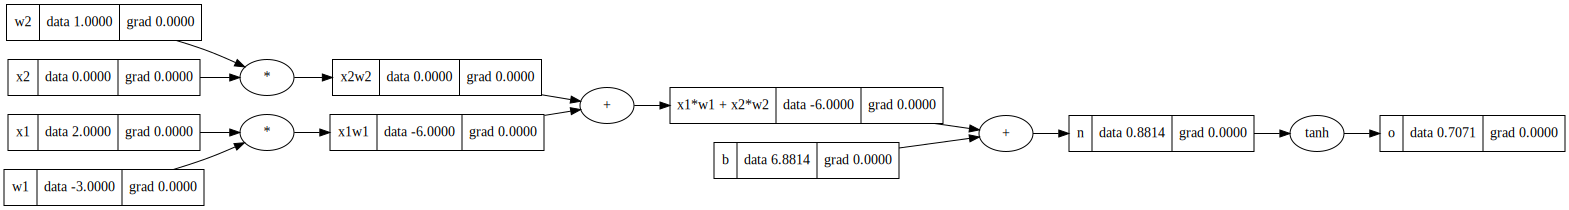

In [189]:
draw_dot(o)

#### Bakprogatation manually

In [191]:
n.grad = 0.5 # due to tanh

In [190]:
o.grad = 1.0 # becuase change in o due to change in o is always 1

In [198]:
x1w1x2w2.grad = 0.5 # because + just distribute the gradient so
b.grad = 0.5 # it will be same as the gradient of its child node

In [200]:
x1w1.grad = 0.5
x2w2.grad = 0.5 # here also same due to addition

In [201]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad # chain rule

In [203]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

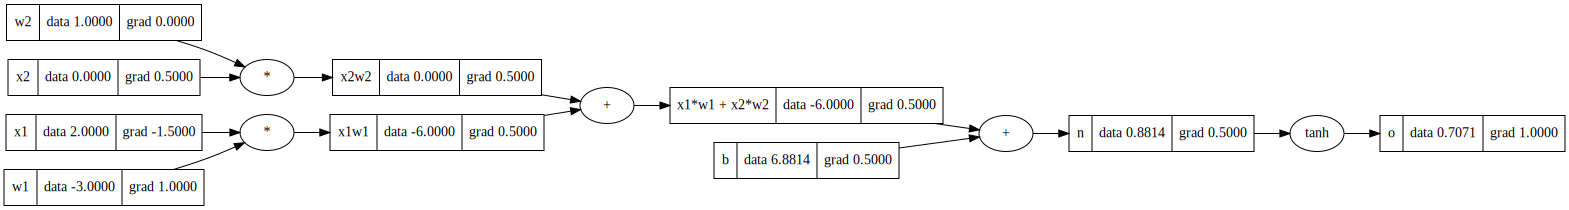

In [205]:
draw_dot(o) # gradient of w2 is 0 because it is weight associated with x2 and it says if we change w2 how much it will influence to output
# the influence that w2 change will cause is 0.00 as grad value because
# the change in w2 will not impact to output because the input x2 is 0 and how much we change the w2 it will always be 0 due to input x2 0 so the gradient
# we get here is also 0

#### Verification of gradient

In [208]:
# tanh derivative : 1 - (tanh(n)**2)
# do/dn = do/dtanh * dtanh(n)/dn = 1 *  (1 - o**2) because o is already tanhed
1 - o.data**2

0.4999999999999999

In [199]:
# we know when there is + it is just a distribution of gradient so it will just distribute the gradient to its children node
# for n = x1w1x2w2 + b
# dn/b = 1
# dn/x1w1x2w2 = 1
# so, do/b = do/dn * dn/b = 0.5 which is previous grad
# similarly for do/x1w1x2w2 = do/dn * dn/x1w1x2w2 = 0.5 which is previous grad same

## Backprogatation AutoMatically

In [234]:
class Value:
    def __init__(self, data: int, _children: tuple = (), _op: str="", label: str=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None # because we are not calculating gradient for leaf value

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        """get the other value, add to this value and return a new value"""
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
          self.grad = 1.0 * out.grad # for + it is just a gradient distributor
          other.grad = 1.0 * out.grad # so the grad for the value will be the grad of the output
        out._backward = _backward # later can call this function to calculate it when needed to calculate
        return out

    def __mul__(self, other): # instance_a.__mul__(instance_b)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
          self.grad = other.data * out.grad
          other.grad = self.data * out.grad # chain rule

        out._backward = _backward # will later call this when needed

        return out

    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1)/(np.exp(2*x) + 1)
        out = Value(t, (self, ), "tanh")

        def _backward():
          self.grad = (1 - t**2) * out.grad # local derivative * out grad
        out._backward = _backward # for tanh the derivative is (1-tanh(n)**2)
        return out

In [235]:
x1 = Value(2.0, label="x1") # input 1
x2 = Value(0.0, label="x2") # input 2

w1 = Value(-3.0, label="w1") # weight 1
w2 = Value(1.0, label="w2") # weight 2
b = Value(6.8813735870195432, label="b") # bias 1

x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1w1x2w2 + b; n.label = "n"

o = n.tanh(); o.label = "o"

# input1:  O>
#      w1 and w2 and bias      O ->   tanh(n) -> output
# input2: O>

In [236]:
o.grad = 1.0

In [237]:
o._backward()

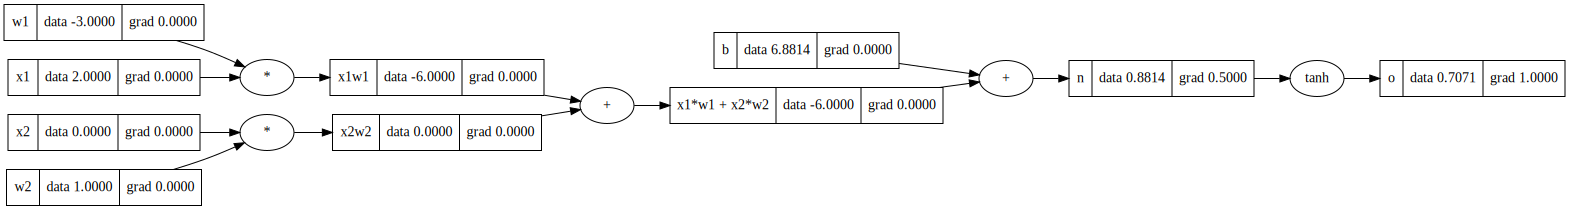

In [238]:
draw_dot(o)

In [239]:
n._backward()

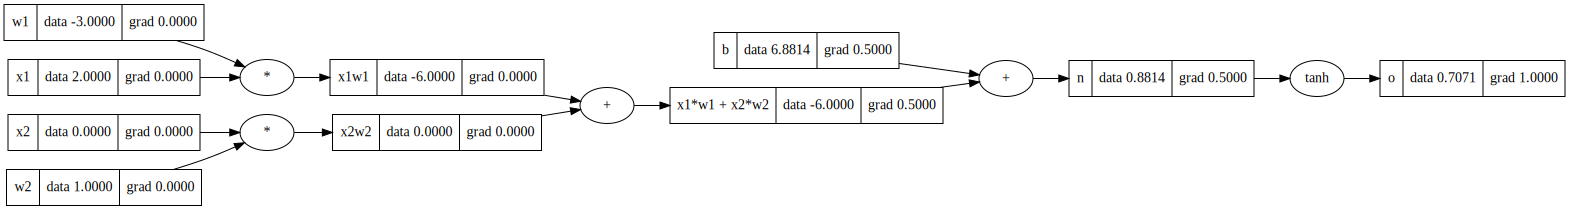

In [240]:
draw_dot(o)

In [241]:
b._backward() # nothing happen for leaf node

In [242]:
x1w1x2w2._backward()

In [243]:
x1w1._backward()
x2w2._backward()

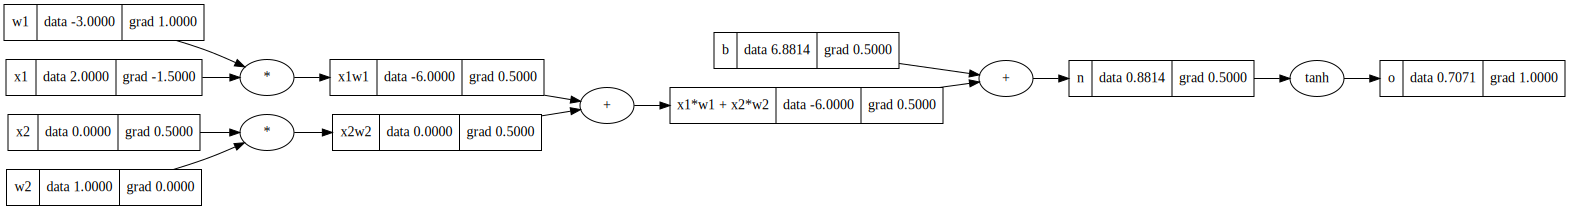

In [244]:
draw_dot(o)

#### Topological sort
We need topological sort because while backpropagating we want to calculate gradient from outer node to the input node in chain

In [251]:
x1 = Value(2.0, label="x1") # input 1
x2 = Value(0.0, label="x2") # input 2

w1 = Value(-3.0, label="w1") # weight 1
w2 = Value(1.0, label="w2") # weight 2
b = Value(6.8813735870195432, label="b") # bias 1

x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1w1x2w2 + b; n.label = "n"

o = n.tanh(); o.label = "o"

# input1:  O>
#      w1 and w2 and bias      O ->   tanh(n) -> output
# input2: O>

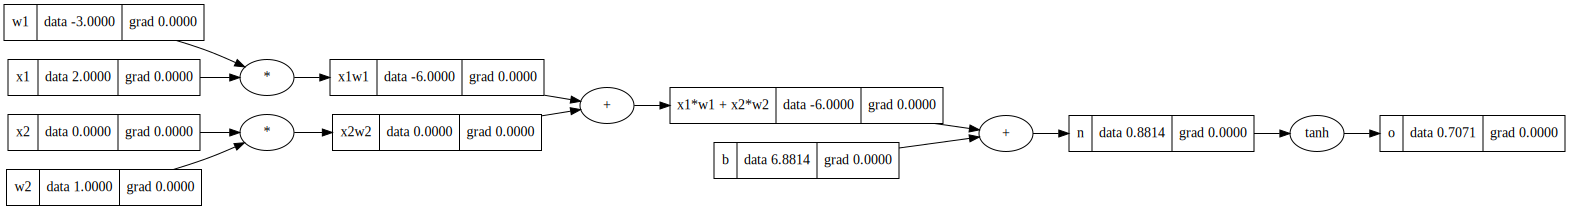

In [254]:
draw_dot(o)

In [257]:
o.grad = 1

In [253]:
topo = []
visited = set()

def topo_sort(v):
  if v not in visited:
    visited.add(v)

    for child in v._prev:
      topo_sort(child)

    topo.append(v)

topo_sort(o)

topo

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [258]:
for node in reversed(topo):
  node._backward()

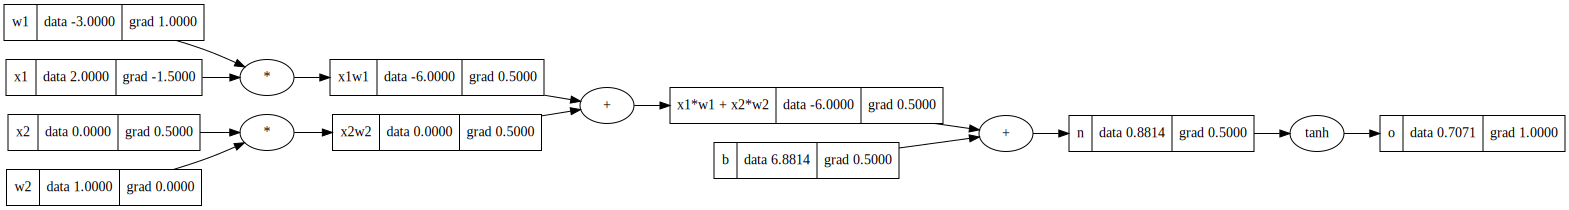

In [259]:
draw_dot(o)

## Updating our Value Class

In [262]:
class Value:
    def __init__(self, data: int, _children: tuple = (), _op: str="", label: str=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None # because we are not calculating gradient for leaf value

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        """get the other value, add to this value and return a new value"""
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
          self.grad = 1.0 * out.grad # for + it is just a gradient distributor
          other.grad = 1.0 * out.grad # so the grad for the value will be the grad of the output
        out._backward = _backward # later can call this function to calculate it when needed to calculate
        return out

    def __mul__(self, other): # instance_a.__mul__(instance_b)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
          self.grad = other.data * out.grad
          other.grad = self.data * out.grad # chain rule

        out._backward = _backward # will later call this when needed

        return out

    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1)/(np.exp(2*x) + 1)
        out = Value(t, (self, ), "tanh")

        def _backward():
          self.grad = (1 - t**2) * out.grad # local derivative * out grad
        out._backward = _backward # for tanh the derivative is (1-tanh(n)**2)
        return out

    def backward(self):
      topo = []
      visited = set()

      def topo_sort(v):
        # check the visited node and add if not visited
         if v not in visited:
          visited.add(v)
          # check the child node
          for child in v._prev:
            topo_sort(child)
          # append after traversing all child node
          topo.append(v)
      # build topo graph
      topo_sort(self)

      self.grad = 1.0 # gradient of last node is 1.0

      for node in reversed(topo): # call each node backpropagation from last node in order
        node._backward()


### Verify

In [263]:
x1 = Value(2.0, label="x1") # input 1
x2 = Value(0.0, label="x2") # input 2

w1 = Value(-3.0, label="w1") # weight 1
w2 = Value(1.0, label="w2") # weight 2
b = Value(6.8813735870195432, label="b") # bias 1

x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

n = x1w1x2w2 + b; n.label = "n"

o = n.tanh(); o.label = "o"

# input1:  O>
#      w1 and w2 and bias      O ->   tanh(n) -> output
# input2: O>

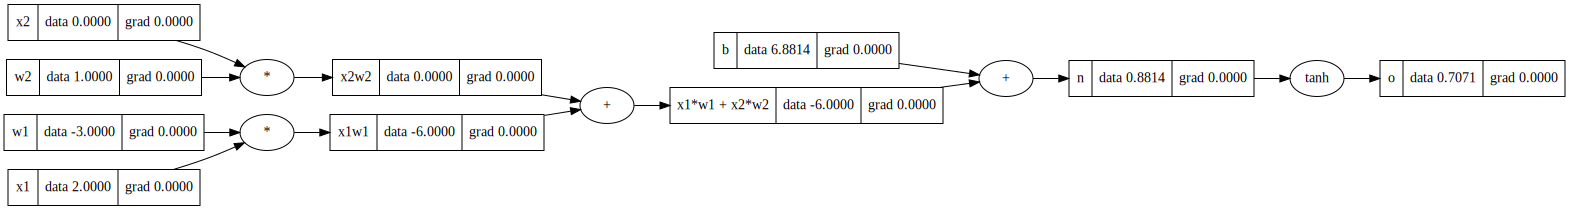

In [264]:
draw_dot(o)

In [265]:
o.backward()

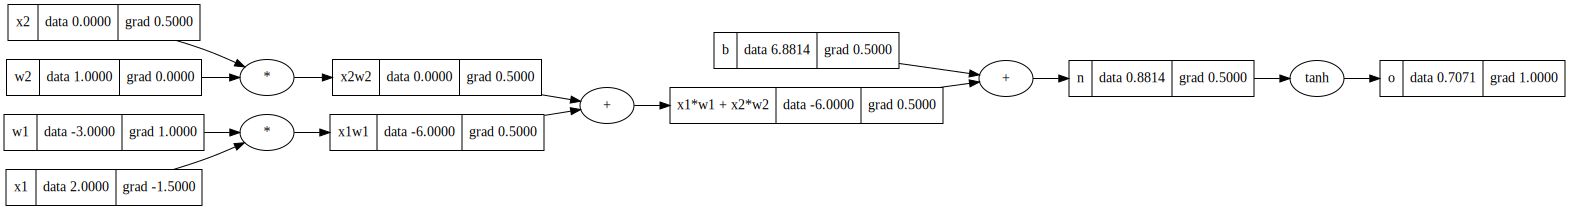

In [266]:
draw_dot(o)

### A bug

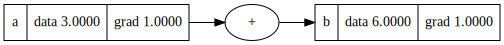

In [270]:
a = Value(3.0, label="a")
b = a + a; b.label = "b"
b.backward() # db/da = should be 2 but got 1
draw_dot(b) # in our logic if there is addition we set the gradient to the gradient equal to out grdient which is 1
# in our case self and other is same a in our case and we are overwriting the gradient by 1 instead of adding to 2

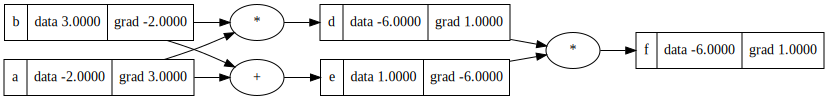

In [273]:
a = Value(-2.0, label="a")
b = Value(3.0, label="b")

d = a * b; d.label = "d"
e = a + b; e.label = "e"
f = d * e; f.label = "f"

f.backward()

draw_dot(f) # we get error when using a variable more than once due to overwriting
# solution: accumulation of gradient

In [274]:
class Value:
    def __init__(self, data: int, _children: tuple = (), _op: str="", label: str=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None # because we are not calculating gradient for leaf value

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        """get the other value, add to this value and return a new value"""
        out = Value(self.data + other.data, (self, other), "+")

        def _backward():
          self.grad += 1.0 * out.grad # for + it is just a gradient distributor
          other.grad += 1.0 * out.grad # so the grad for the value will be the grad of the output
        out._backward = _backward # later can call this function to calculate it when needed to calculate
        return out

    def __mul__(self, other): # instance_a.__mul__(instance_b)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
          self.grad += other.data * out.grad
          other.grad += self.data * out.grad # chain rule

        out._backward = _backward # will later call this when needed

        return out

    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1)/(np.exp(2*x) + 1)
        out = Value(t, (self, ), "tanh")

        def _backward():
          self.grad += (1 - t**2) * out.grad # local derivative * out grad
        out._backward = _backward # for tanh the derivative is (1-tanh(n)**2)
        return out

    def backward(self):
      topo = []
      visited = set()

      def topo_sort(v):
        # check the visited node and add if not visited
         if v not in visited:
          visited.add(v)
          # check the child node
          for child in v._prev:
            topo_sort(child)
          # append after traversing all child node
          topo.append(v)
      # build topo graph
      topo_sort(self)

      self.grad = 1.0 # gradient of last node is 1.0

      for node in reversed(topo): # call each node backpropagation from last node in order
        node._backward()


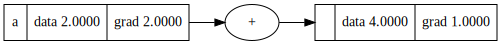

In [275]:
a = Value(2.0, label="a")
b = a + a
b.backward()
draw_dot(b)